Analyse des Verhältnisses von Handelsvolumen zu Preisbewegungen
Dieser Code berechnet, wie das Handelsvolumen (volumefrom) mit den täglichen Preisänderungen korreliert. Die tägliche Preisänderung wird als prozentuale Änderung zwischen dem open und close Preis berechnet.

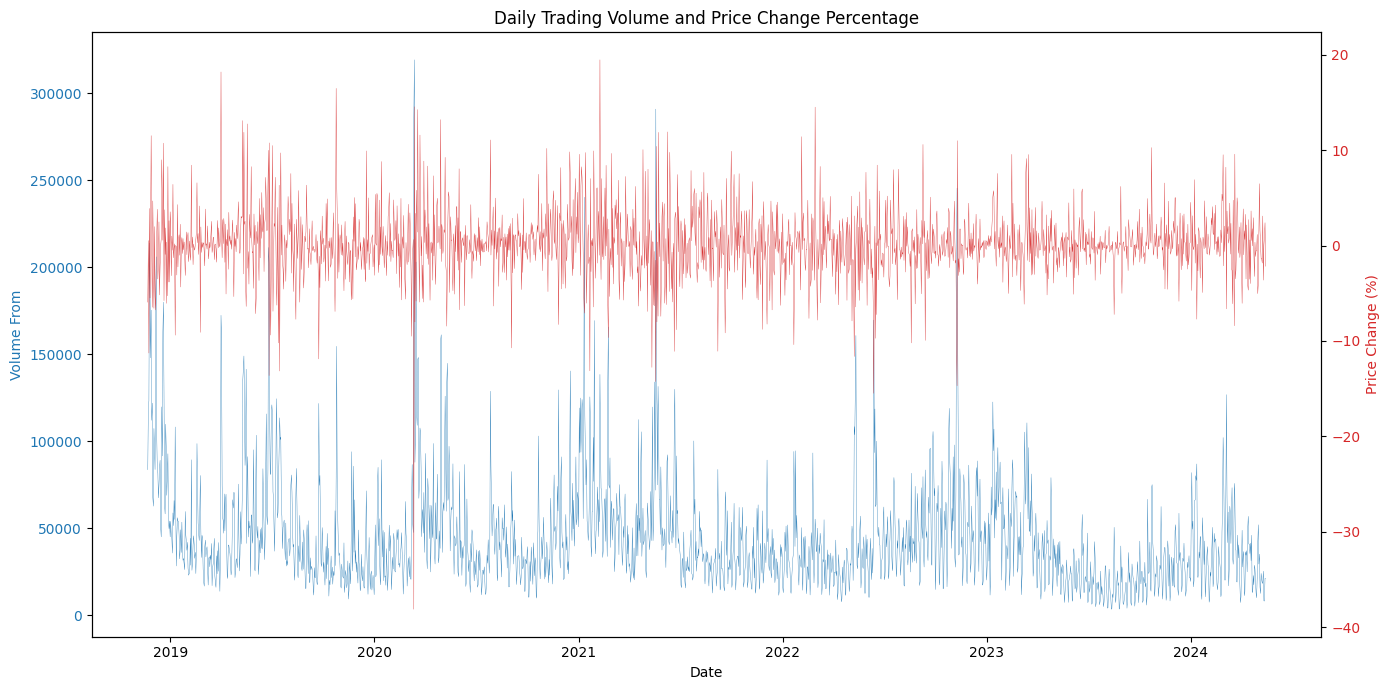

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sqlite3
import os

# Verbindung zur SQLite-Datenbank herstellen
db_path = os.path.join('..', 'bitcoin_analysis.db')  # Pfad zur Datenbank im Hauptverzeichnis
conn = sqlite3.connect(db_path)

# Daten laden
df = pd.read_sql('SELECT * FROM bitcoin_prices', conn)
conn.close()

# Zeitstempel konvertieren
df['time'] = pd.to_datetime(df['time'])

# Berechnung der prozentualen täglichen Preisänderung
df['price_change_pct'] = (df['close'] - df['open']) / df['open'] * 100

# Visualisierung des Verhältnisses von Volumen zu Preisänderung
fig, ax1 = plt.subplots(figsize=(14, 7))

# Volumen
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume From', color=color)
ax1.plot(df['time'], df['volumefrom'], color=color, linewidth=0.25) 
ax1.tick_params(axis='y', labelcolor=color)

# Formatieren der x-Achse
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Jedes Jahr eine Markierung
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Nur das Jahr anzeigen

# Preisänderung
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Price Change (%)', color=color)
ax2.plot(df['time'], df['price_change_pct'], color=color, linewidth=0.25)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily Trading Volume and Price Change Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


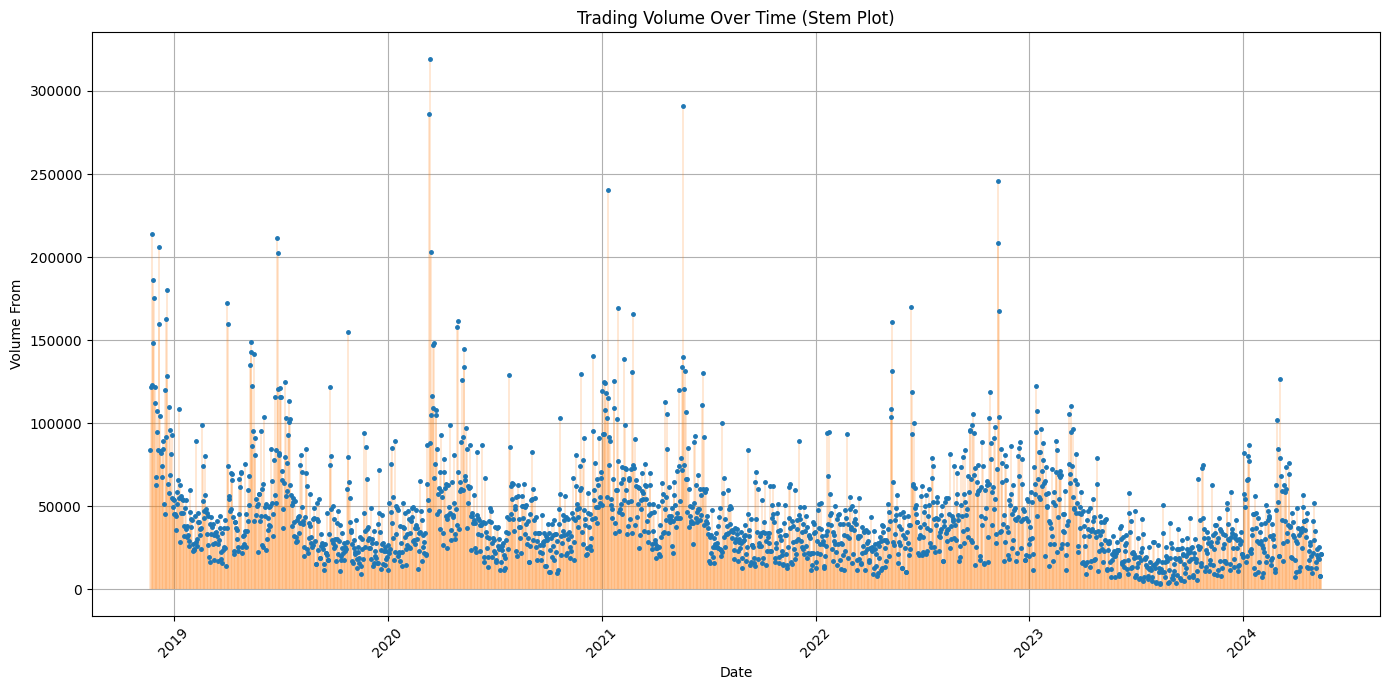

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sqlite3
import os

# Verbindung zur SQLite-Datenbank herstellen
db_path = os.path.join('..', 'bitcoin_analysis.db')  # Pfad zur Datenbank im Hauptverzeichnis
conn = sqlite3.connect(db_path)

# Daten laden
df = pd.read_sql('SELECT * FROM bitcoin_prices', conn)
conn.close()

# Zeitstempel konvertieren
df['time'] = pd.to_datetime(df['time'])

# Stem Plot für das Handelsvolumen
plt.figure(figsize=(14, 7))
(markerline, stemlines, baseline) = plt.stem(df['time'], df['volumefrom'], linefmt='-', markerfmt='o', basefmt='-')

# Setze die Eigenschaften für die Linien und Punkte
plt.setp(markerline, color='tab:blue', markersize=2.5)  # Blaue Markierungen
plt.setp(stemlines, color='tab:orange', linewidth=0.25)  # Orangefarbene Stängel
plt.setp(baseline, visible=False)  # Verstecke die Basislinie

# Beschriftungen und Titel
plt.title('Trading Volume Over Time (Stem Plot)')
plt.xlabel('Date')
plt.ylabel('Volume From')

# Formatieren der x-Achse
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


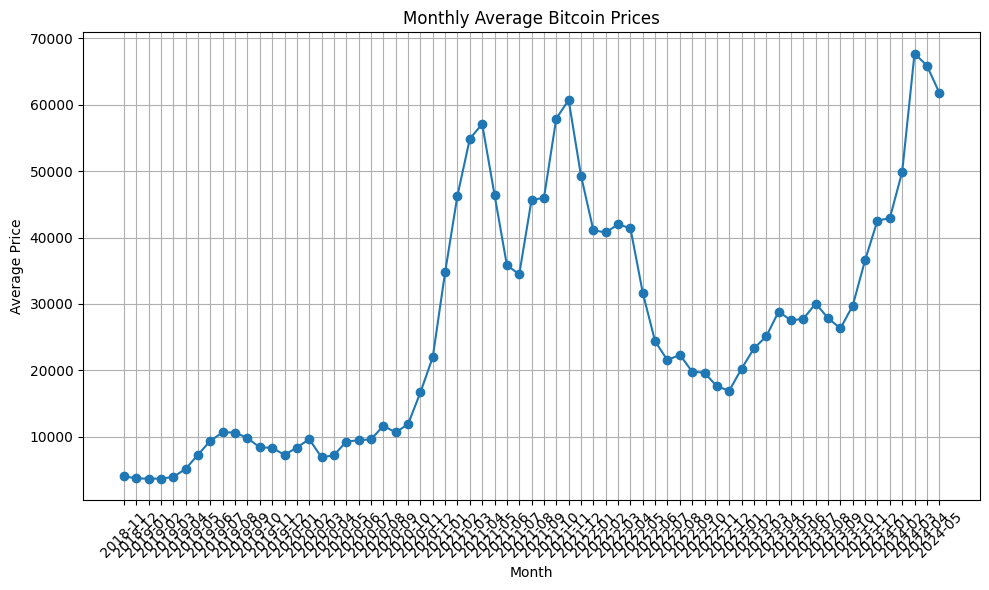

In [7]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect(db_path)

# Daten laden
df = pd.read_sql('SELECT * FROM bitcoin_prices', conn)
conn.close()

# Zeitstempel konvertieren
df['time'] = pd.to_datetime(df['time'])

# Durchschnittlicher monatlicher Preis
df['month'] = df['time'].dt.to_period('M')
monthly_avg = df.groupby('month')['close'].mean().reset_index()

# Visualisierung der monatlichen Durchschnittspreise
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['month'].astype(str), monthly_avg['close'], marker='o')
plt.title('Monthly Average Bitcoin Prices')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


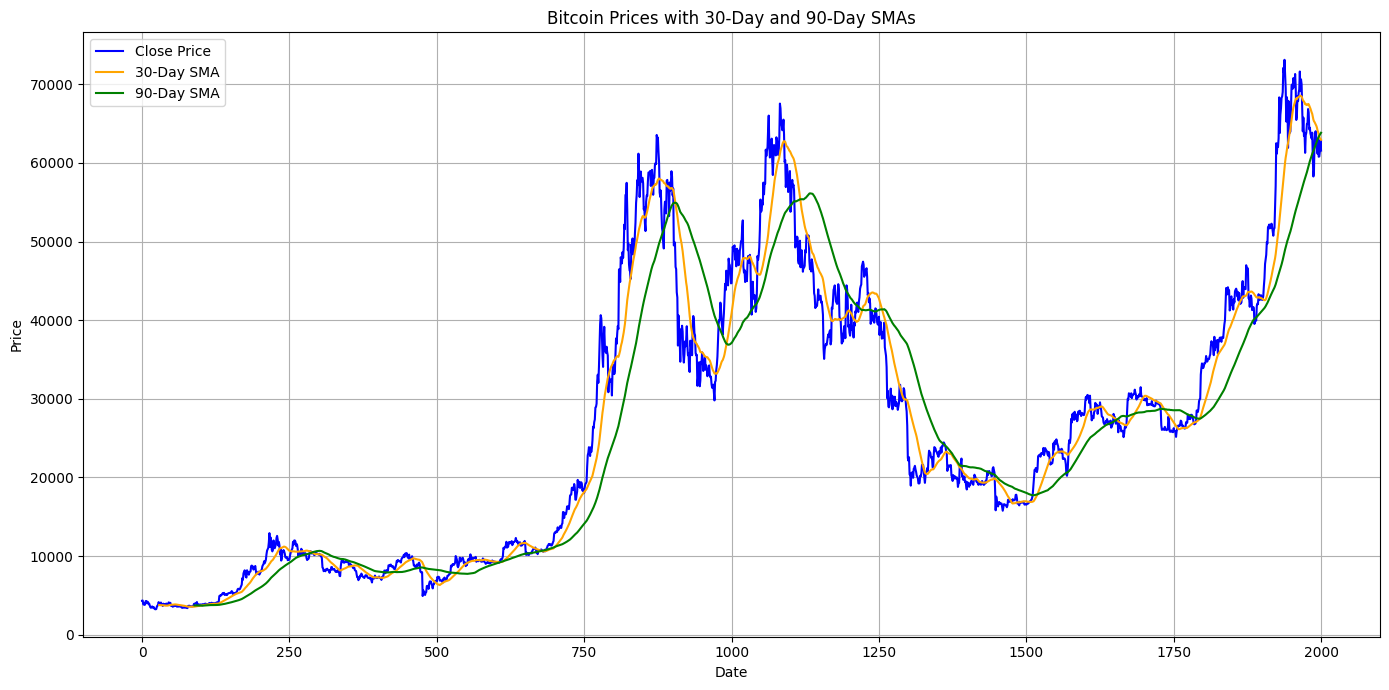

In [2]:
# Berechnung der gleitenden Durchschnitte
df['SMA_30'] = df['close'].rolling(window=30).mean()
df['SMA_90'] = df['close'].rolling(window=90).mean()

# Visualisierung der gleitenden Durchschnitte
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['SMA_30'], label='30-Day SMA', color='orange')
plt.plot(df['SMA_90'], label='90-Day SMA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Prices with 30-Day and 90-Day SMAs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Volumen Trends
Dieser Code visualisiert das Handelsvolumen (volumefrom) über die Zeit, um Trends oder Muster im Handelsvolumen zu identifizieren.

/Users/Driton/VScode/BitcoinAnalysis/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
01:03:59 - cmdstanpy - INFO - Chain [1] start processing
01:04:00 - cmdstanpy - INFO - Chain [1] done processing


             ds          yhat    yhat_lower     yhat_upper
2361 2025-05-10  97630.943887  61344.932612  138538.698794
2362 2025-05-11  97519.794843  60363.493949  140270.573446
2363 2025-05-12  97460.251538  59316.478795  140595.162974
2364 2025-05-13  97241.182668  58649.286751  139205.467129
2365 2025-05-14  97187.290783  59066.960630  139731.044001


/Users/Driton/VScode/BitcoinAnalysis/venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/Driton/VScode/BitcoinAnalysis/venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


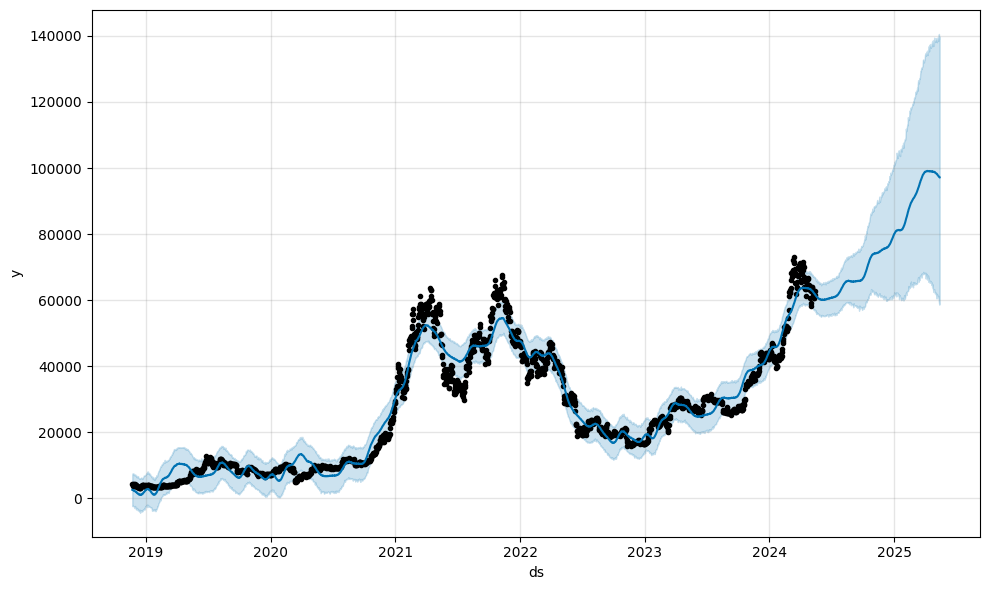

/Users/Driton/VScode/BitcoinAnalysis/venv/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/Driton/VScode/BitcoinAnalysis/venv/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/Driton/VScode/BitcoinAnalysis/venv/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing

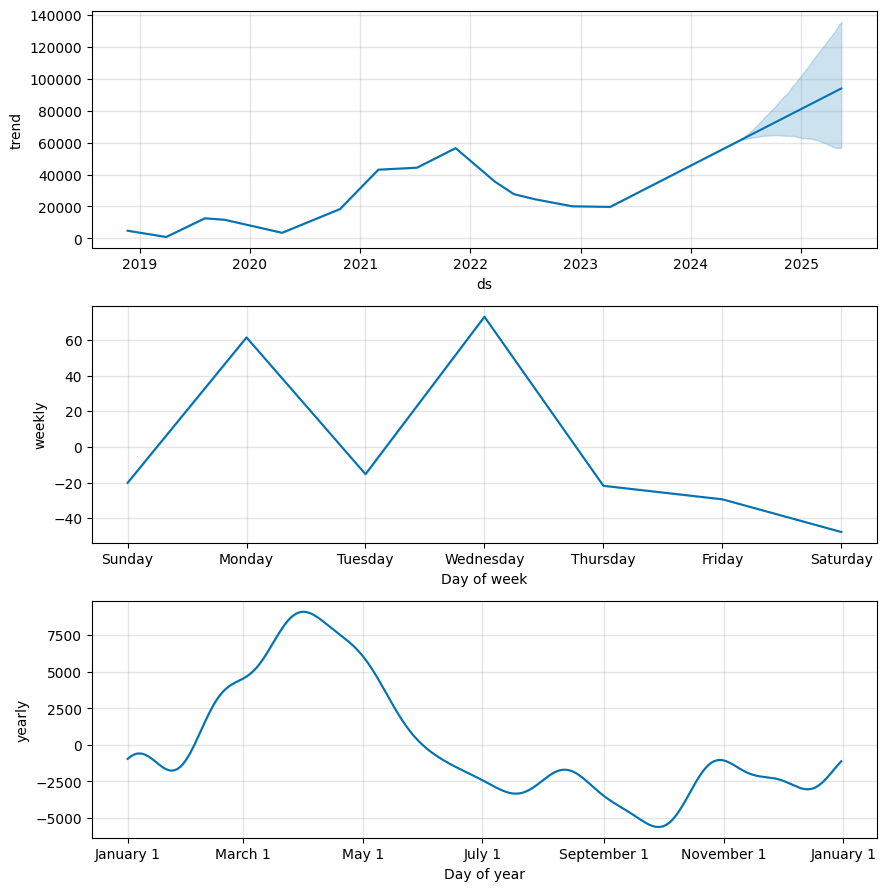

In [4]:
import pandas as pd
import sqlite3
import os
from prophet import Prophet
import matplotlib.pyplot as plt

# Verbindung zur SQLite-Datenbank herstellen
db_path = os.path.join('..', 'bitcoin_analysis.db')
conn = sqlite3.connect(db_path)

# Daten laden
df = pd.read_sql('SELECT time AS ds, close AS y FROM bitcoin_prices', conn)
conn.close()

# Zeitstempel konvertieren
df['ds'] = pd.to_datetime(df['ds'])

# Prophet-Modell erstellen und anpassen
model_btc = Prophet()
model_btc.fit(df)

# Zukunftsvorhersage erstellen
future_btc = model_btc.make_future_dataframe(periods=365)
forecast_btc = model_btc.predict(future_btc)

# Vorhersage-Daten anzeigen
print(forecast_btc[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail())

# Vorhersage plotten
model_btc.plot(forecast_btc)
plt.show()

# Komponenten der Vorhersage plotten
fig2 = model_btc.plot_components(forecast_btc)
plt.show()
